# Main file where where simulation is run

In [1]:
##  load all the dependencies and files needed
%run loadpackagesandfiles.ipynb


In [2]:
##  create a graph of the loaded data, 
## gives access to variable FG which is the (directed) graph displayed below 
## (if it is not shown the plot can be activated by uncommenting in buildgraph.ipynb file)

%run buildgraph.ipynb
%run EnviromentReport.ipynb

#%run locktest.ipynb

found restriction 9.1
found restriction 8.7


In [3]:

# loop over edges with data and check voorwaarden
'''
for edge in FG_S.edges(data=True):
    if edge[0] in [182]:
        print(edge)
    if edge[1] in [182]:
        print(edge)
    if edge[0] in [132]:
        print(edge)
    if edge[1] in [132]:
        print(edge)


# same for nodes
for node in FG.nodes(data=True):
    if node[0] == 155:
        print(node)
    if node[0] == 156:
        print(node)
    if node[0] == 73:
        print(node)
    if node[0] == 72:
        print(node)

'''


'\nfor edge in FG_S.edges(data=True):\n    if edge[0] in [182]:\n        print(edge)\n    if edge[1] in [182]:\n        print(edge)\n    if edge[0] in [132]:\n        print(edge)\n    if edge[1] in [132]:\n        print(edge)\n\n\n# same for nodes\nfor node in FG.nodes(data=True):\n    if node[0] == 155:\n        print(node)\n    if node[0] == 156:\n        print(node)\n    if node[0] == 73:\n        print(node)\n    if node[0] == 72:\n        print(node)\n\n'

In [4]:
## obtain the paths possible sorted by length 
## (these paths are classes containing node keys and path lengths (in meter?))
%run get_paths.ipynb
#%run testpaths.ipynb

## below you see the data that is contained in a path

In [5]:
print(len(ordered_paths))
#ordered_paths[8].plot(FG, save=True)


54


In [6]:
%run vessels.ipynb

In [7]:
#list_with_vessels = init_vessels([M8, M8_high, M8_loaded_low, M8_loaded], ordered_paths)
#new
#list_with_vesselsM1 = init_vessels([M1, M1_loaded], ordered_paths)

In [8]:
def start(env, vessel):
    while True:
        
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        vessel.report()
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

Queues:  Kreekraklock 0 0 0.9379761930803618
Queues:  Kreekraklock 0 0 1.0342682128730194
Queues:  Kreekraklock 0 0 1.2806237059086054
Queues:  Krammerlock 0 0 1.7246415055709965
Queues:  Kreekraklock 0 0 1.8409008302156014
Queues:  Kreekraklock 0 0 2.0457303021272577
Queues:  Kreekraklock 0 0 2.0546082246730992
Queues:  Kreekraklock 0 0 2.902125355730163
Queues:  Kreekraklock 0 0 2.9773613684362283
Queues:  Kreekraklock 0 0 3.5307074850038984
Queues:  Krammerlock 0 0 3.628159482960571
Queues:  Krammerlock 0 0 3.6648825898757598
Queues:  Krammerlock 0 0 3.74687920888437
Queues:  Hansweertlock 0 0 3.8005851987620964
Queues:  Hansweertlock 0 0 3.914747477492403
Queues:  Kreekraklock 0 0 3.990504004818777
Queues:  Krammerlock 0 0 4.061439352925422
Queues:  Krammerlock 0 0 4.071681323957603
Queues:  Kreekraklock 0 0 4.083309254617202
Queues:  Krammerlock 0 2 4.16496129577534
Queues:  Hansweertlock 0 0 4.175541399281417
Queues:  Kreekraklock 0 0 4.2465623024837695
Queues:  Kreekraklock 0 0 

Queues:  Kreekraklock 6 5 12.290233870660048
Queues:  Hansweertlock 1 0 12.292050694247319
Queues:  Kreekraklock 5 6 12.333120228403924
Queues:  Kreekraklock 6 5 12.413635526310525
Queues:  Krammerlock 4 4 12.417905853969156
Queues:  Kreekraklock 6 5 12.42283396328098
Queues:  Hansweertlock 1 1 12.426953916298656
Queues:  Krammerlock 3 4 12.456956204654068
Queues:  Krammerlock 3 4 12.466848811383166
Queues:  Hansweertlock 1 2 12.52566005093811
Queues:  Krammerlock 5 4 12.561816809741234
Queues:  Krammerlock 5 4 12.562482128519923
Queues:  Hansweertlock 2 2 12.590883594250904
Queues:  Kreekraklock 6 6 12.600028936279628
Queues:  Kreekraklock 6 6 12.607471830335307
Queues:  Kreekraklock 6 6 12.61599450140941
Queues:  Kreekraklock 6 6 12.64026265799807
Queues:  Krammerlock 5 6 12.664691674573728
Queues:  Kreekraklock 6 9 12.666315423574616
Queues:  Kreekraklock 6 9 12.6689938843643
Queues:  Kreekraklock 6 10 12.680800868982745
Queues:  Krammerlock 5 6 12.699574246214066
Queues:  Kreekrakl

Queues:  Krammerlock 8 8 17.480029698393285
Queues:  Krammerlock 8 10 17.504032889994615
Queues:  Kreekraklock 20 20 17.50944023599517
Queues:  Hansweertlock 0 1 17.53451740579435
Queues:  Hansweertlock 0 1 17.56024473545156
Queues:  Krammerlock 8 11 17.564896263017147
Queues:  Krammerlock 9 11 17.617043547339144
Queues:  Kreekraklock 19 19 17.68350656375351
Queues:  Kreekraklock 19 20 17.75999330337643
Queues:  Krammerlock 10 11 17.769341791130287
Queues:  Krammerlock 10 11 17.784401638364326
Queues:  Kreekraklock 19 19 17.861107861738997
Queues:  Hansweertlock 0 0 17.955421505050587
Queues:  Krammerlock 12 9 17.979789337349466
Queues:  Kreekraklock 18 20 17.992771039869876
Queues:  Kreekraklock 18 20 17.99755925769406
Queues:  Hansweertlock 0 0 18.04336374375933
Queues:  Kreekraklock 20 20 18.062678042198165
Queues:  Kreekraklock 19 20 18.1718369674245
Queues:  Kreekraklock 19 20 18.173124350459357
Queues:  Krammerlock 10 9 18.23465124252449
Queues:  Kreekraklock 20 20 18.33537161668

Queues:  Krammerlock 8 8 23.960205222135116
Queues:  Hansweertlock 0 1 23.972184943389838
Queues:  Hansweertlock 0 1 23.982187022616742


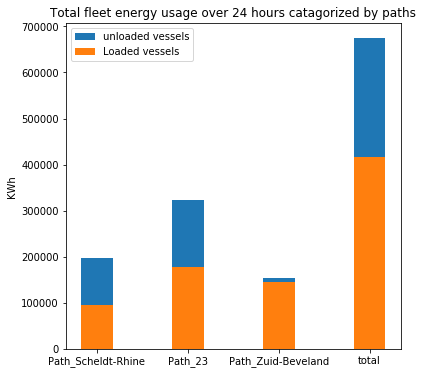

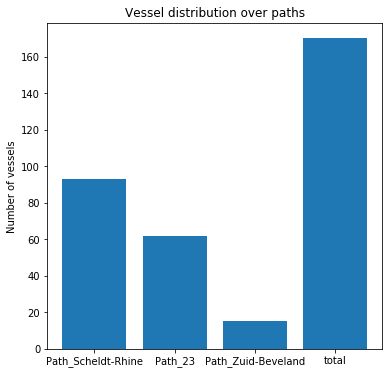

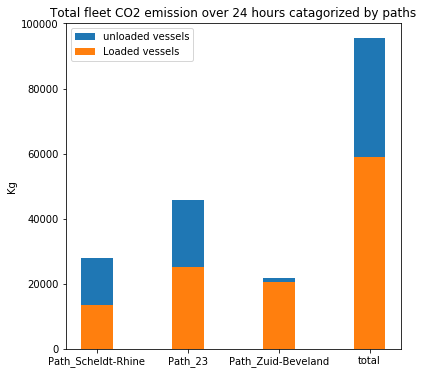

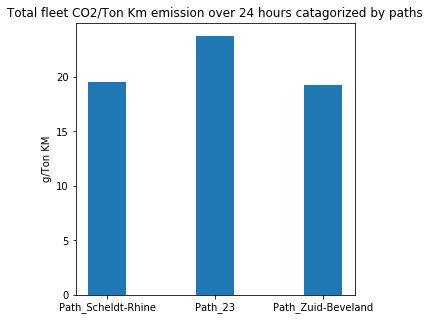

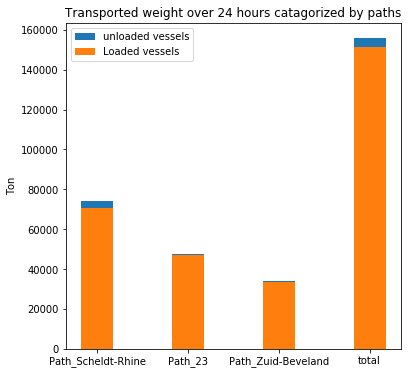

In [9]:
# Add graph to environment
env.FG = FG

env.paths = {}
env.enviromental_report = EnviromentReport()
# 24hours
SIM_TIME = 60 * 60  * 24 
vessels = []

def pois(t):
    hour = int((t%(24*3600))/3600)
    average_on_hour = [6,7,7,8,9,10,12,16,21,22,22,23,23,22,21,19,17,15,14,13,12,10,7,6]
    number_of_boats_this_hour = np.random.poisson(average_on_hour[hour])
    if number_of_boats_this_hour == 0:
        return 0
    return 60 * 60 / number_of_boats_this_hour

def setup(env, distribution):
    # initial vessel
    i = 1
    vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
    vessel.env = env
    vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
    env.process(start(env, vessel))
    vessels.append(vessel)

    while True:
        #break
        # timeout before next ship is released
        i += 1
        yield env.timeout(distribution(env.now))
        vessel = init_random_vessel(ordered_paths, "ship-{}".format(i))
        vessel.env = env
        vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
        env.process(start(env, vessel))
        vessels.append(vessel)
         
        

        
env.process(setup(env, pois))

env.crossover_points = {182: ((184, 394,154,155,156,216,217, 218), (164, 134,133, 132,73,72,71,402,401)),
                        2: ((218,217,216,156,155,154,394,184), (401, 402,71,72,73,132,133,134,164)),
                        141: ((140,139,179,178,379), (363, 364, 365, 317, 403)),
                        382: ((379,178,179,139,140), (403,317,365,364,363)),
                        273:((222,221,220,279), (272, 209, 208, 210)),
                        278: ((279,220,221,222), (210,208, 209,272))                        
}

env.epoch = datetime.datetime.now()


env.run(until=SIM_TIME)

# EnviromentReport notebook for plot calculations
env.enviromental_report.plot_energy_usage()
env.enviromental_report.plot_path_usage()
env.enviromental_report.plot_co2_emission()
env.enviromental_report.plot_co2_emission_km_load()
env.enviromental_report.plot_transported_weight_corridor()

In [10]:
env.enviromental_report.get_transported_weight_corridor()

{'Path_Scheldt-Rhine': {'loaded': 70725.0, 'unloaded': 3625.0},
 'Path_23': {'loaded': 46955.5, 'unloaded': 400.0},
 'Path_Zuid-Beveland': {'loaded': 33625.0, 'unloaded': 450.0}}

In [11]:
vessel_log = pd.DataFrame.from_dict(vessels[0].log)
#
print(vessel_log.to_string())
print(len(vessels))


                                     Message     Timestamp Value                               Geometry
0                              Start sailing      0.000000                 POINT (4.3007857 51.3503648)
1      Sailing from node 41 to node 42 start      0.000000     0           POINT (4.3007857 51.3503648)
2       Sailing from node 41 to node 42 stop    256.277942     0           POINT (4.3006953 51.3591295)
3      Sailing from node 42 to node 66 start    256.277942     0           POINT (4.3006953 51.3591295)
4       Sailing from node 42 to node 66 stop    381.254216     0           POINT (4.3005744 51.3634031)
5      Sailing from node 66 to node 67 start    381.254216     0           POINT (4.3005744 51.3634031)
6       Sailing from node 66 to node 67 stop    516.296291     0           POINT (4.3004438 51.3680209)
7      Sailing from node 67 to node 68 start    516.296291     0           POINT (4.3004438 51.3680209)
8       Sailing from node 67 to node 68 stop    527.373104     0

Path_23


C:\Users\leo1_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


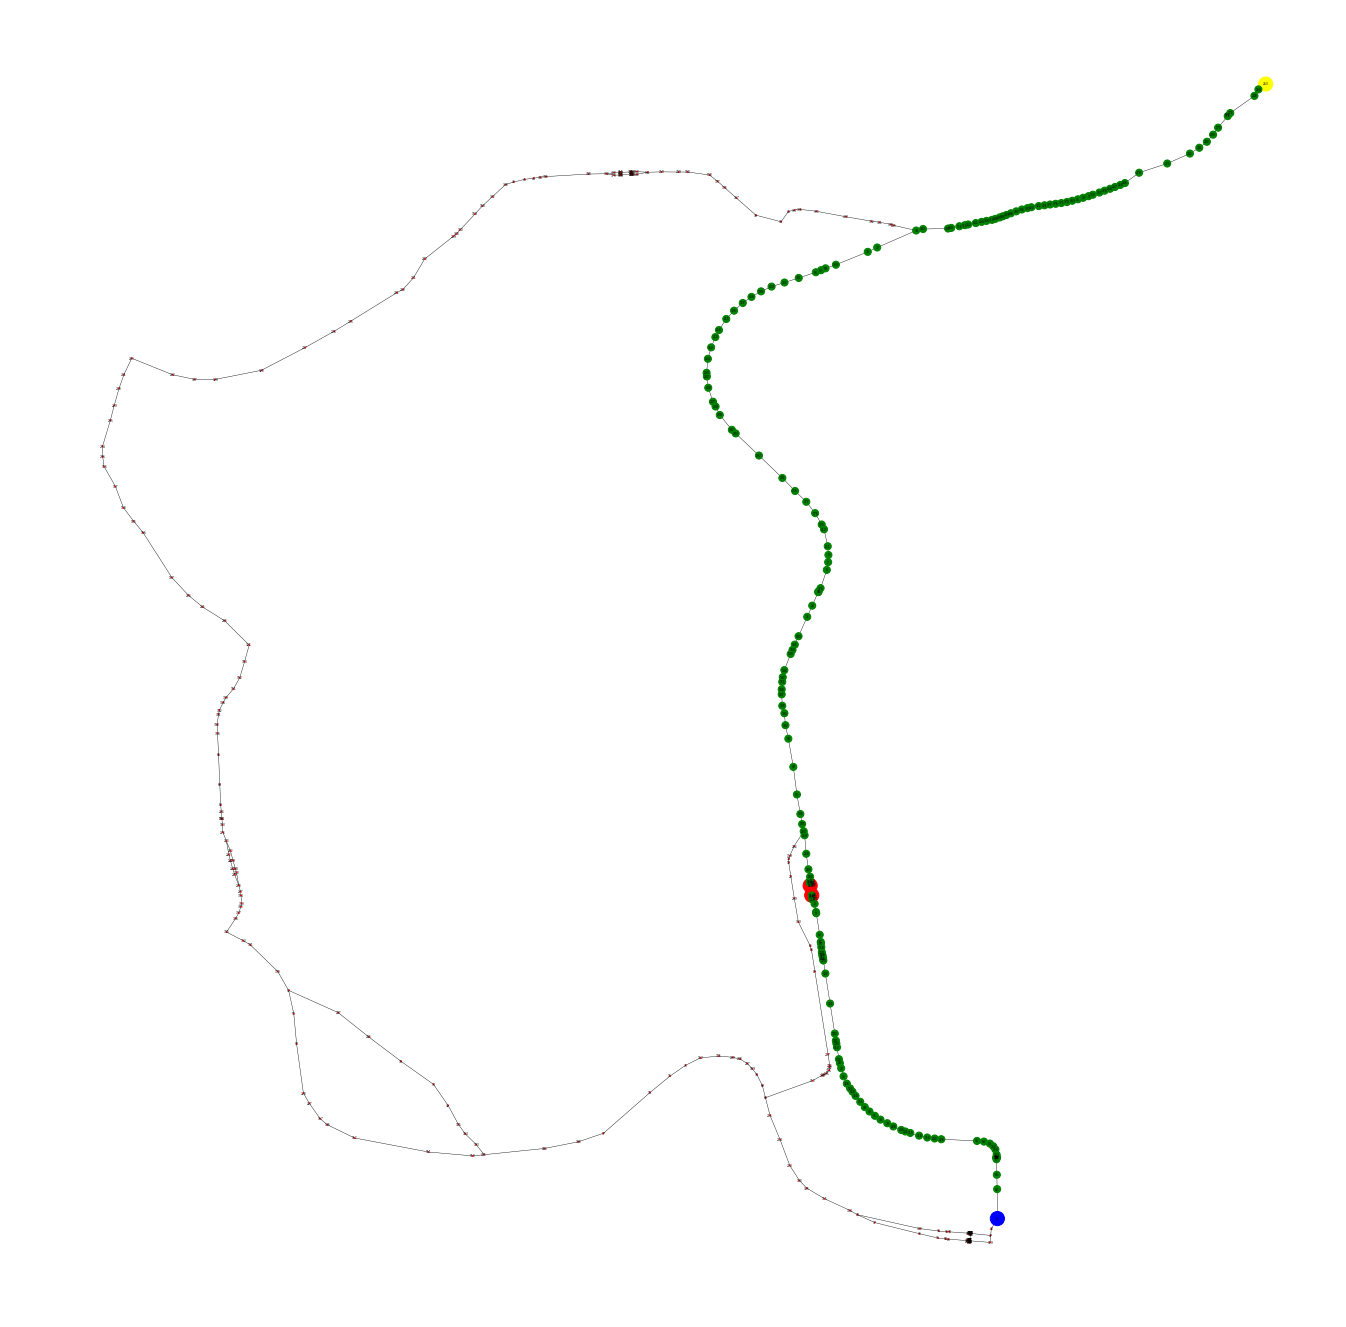

In [16]:
# running  saves a plot for all vessels
'''
for vessel in vessels[:10]:
    print(vessel.path_complete.name)
    vessel.path_complete.plot(FG, True, vessel.name)
''' 
print(vessels[3].path_complete.name)
vessels[2].path_complete.plot(FG, False, vessels[2].name)

In [13]:
# this way I can see activity at lock
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        print(lock_log, edge[2]["attribute"].lock_name)

           Message     Timestamp     Value
0     Ship in lock   3526.073013    ship-1
1     Ship in lock   3856.210335    ship-2
2     Ship in lock   4732.778744    ship-4
3    Ship out lock   5086.073013    ship-1
4    Ship out lock   5416.210335    ship-2
5    Ship out lock   6292.778744    ship-4
6     Ship in lock   7830.839182    ship-3
7     Ship in lock   8461.521278    ship-9
8     Ship in lock   8470.799335    ship-7
9    Ship out lock   9390.839182    ship-3
10   Ship out lock  10021.521278    ship-9
11   Ship out lock  10030.799335    ship-7
12    Ship in lock  11540.496049   ship-14
13    Ship in lock  11898.520253   ship-10
14   Ship out lock  13100.496049   ship-14
15   Ship out lock  13458.520253   ship-10
16    Ship in lock  13810.986961    ship-6
17    Ship in lock  14854.614611    ship-8
18   Ship out lock  15370.986961    ship-6
19    Ship in lock  15569.410611   ship-16
20    Ship in lock  16379.604875   ship-12
21   Ship out lock  16414.614611    ship-8
22   Ship o

In [14]:
print(vessels[0].path_complete.length)
print(vessels[0].loaded_capacity)
print(vessels[0].distance)
print(vessels[0].distance)
print(vessels[0].loaded_capacity)



102468.85182600218
4000
102459.79922065773
102459.79922065773
4000


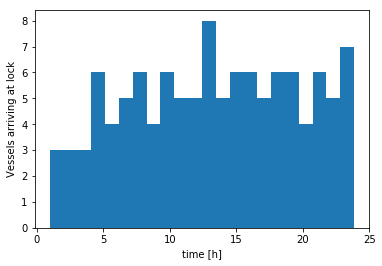

Kreekraklock


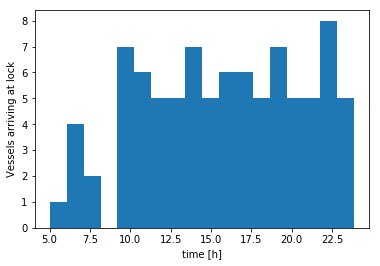

Kreekraklock


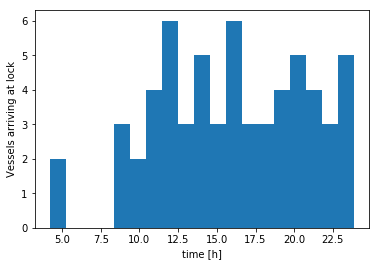

Krammerlock


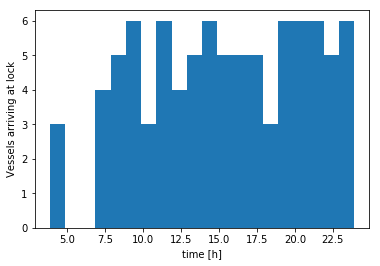

Hansweertlock


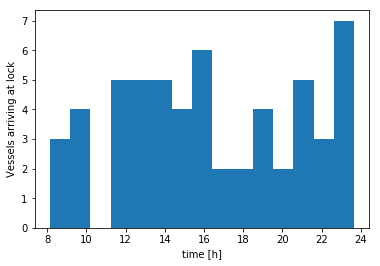

Hansweertlock


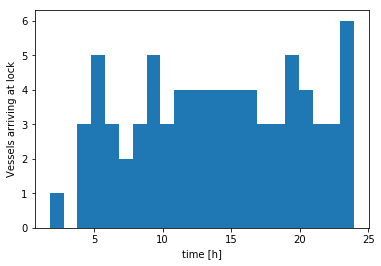

Krammerlock


In [15]:
# this way I can see activity at lock in graph
for edge in FG.edges(data=True):
    if (edge[2]["Object"] == "Lock"):
        edge[2]["attribute"].plot_arrivales()
        lock_log = pd.DataFrame.from_dict(edge[2]["attribute"].log)
        #print(lock_log, edge[2]["attribute"].lock_name)
        print(edge[2]["attribute"].lock_name)
           
        
